## Data Model Evaluation on Test Data
* Load Saved Model and Test Case
* Test The Trained Model
* Visualize Results
* Few More Evaluation Metrices (N-Fold Validation, Confusion Matrix etc)
* Playground

### Load Saved Model and Test Cases

In [1]:
import matplotlib.pyplot as plt
import pickle
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
## Load Model
m3 = open("data/models/model3.mod", 'rb')
model3 = pickle.load(m3)
m3.close()


## Load Saved Test Data

tX = open("data/tests/tx1", 'rb')
Xtest = pickle.load(tX)
tX.close()


tY = open("data/tests/ty1", 'rb')
ytest = pickle.load(tY)
tY.close()

### Test The Trained Model

In [3]:
y = model3.predict(Xtest)

In [4]:
model3.score(Xtest, ytest)

0.8856682769726248

### Visualize Training vs Test Reports

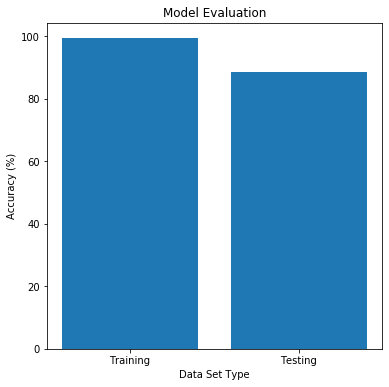

In [5]:
fig, ax = plt.subplots(figsize=(6,6))
ax.set(title="Model Evaluation",
      xlabel="Data Set Type",
      ylabel="Accuracy (%)")
ax.bar(["Training", "Testing"],[99.44, model3.score(Xtest, ytest)*100]);
fig.savefig("data/images/eval.png");

### More Evaluation Metrices

### N-Fold Validation

In [6]:
XData = open("data/tests/X", 'rb')
X = pickle.load(XData)
XData.close()


YData = open("data/tests/Y", 'rb')
Y = pickle.load(YData)
YData.close()

CVData = open("data/tests/CVect", 'rb')
count_vect = pickle.load(CVData)
CVData.close()

In [7]:
from sklearn.model_selection import cross_val_score
n = 10
res = cross_val_score(model3, X, Y, cv=n)
res = [x*100 for x in res]
folds = [ "Fold-"+str(x+1) for x in range(len(res))]
res

[88.10289389067523,
 89.38906752411575,
 86.49517684887459,
 91.96141479099678,
 89.38906752411575,
 86.12903225806451,
 90.96774193548387,
 89.35483870967742,
 89.6774193548387,
 86.7741935483871]

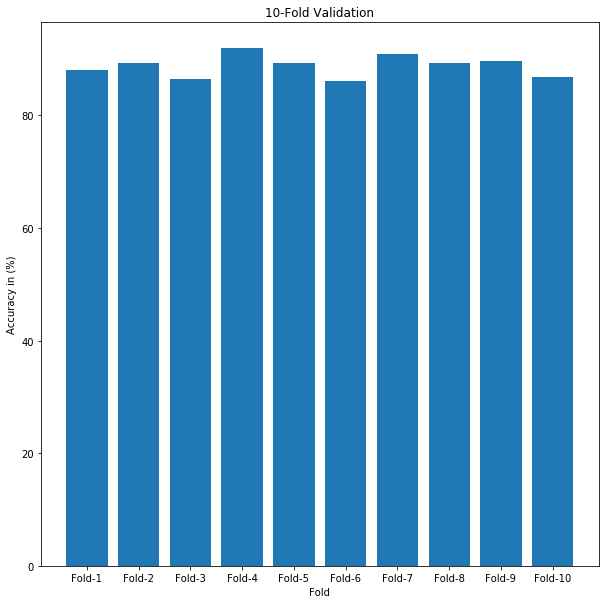

In [8]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title=str(n)+"-Fold Validation",
      xlabel="Fold",
      ylabel="Accuracy in (%)")
ax.bar(folds, res)
fig.savefig("data/images/eval1.png");

### Confusion Matrix

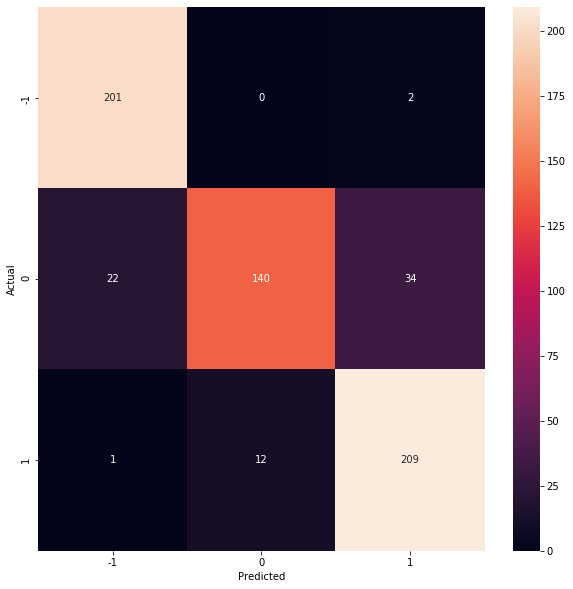

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(ytest, y)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[-1,0,1], yticklabels=[-1,0,1])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
fig.savefig("data/images/eval2.png");

### Playground

In [15]:
# This is sad My flight’s been delayed again.
# Wow! Flight is on time Feeling Happy!
# USA is the country with most flights


model3.predict(count_vect.transform(["Death is depressing"]))

array([-1])